In [146]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [147]:
df=pd.read_csv(r"C:\Users\sanja\Desktop\Task\data_student_synthetic.csv")

In [148]:
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.42,0.49,0.15,0.80,0.11,High
1,0.15,0.15,0.85,0.98,0.89,Low
2,0.79,0.65,0.59,0.75,0.52,Middle
3,0.38,0.84,0.53,0.51,0.69,very_low
4,0.69,0.23,0.27,0.83,0.66,Middle
...,...,...,...,...,...,...
995,0.19,0.54,0.01,0.66,0.18,High
996,0.77,0.43,0.91,0.10,0.57,High
997,0.12,0.68,0.11,0.79,0.08,Low
998,0.51,0.48,0.32,0.80,0.41,Low


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     1000 non-null   float64
 1   SCG     1000 non-null   float64
 2   STR     1000 non-null   float64
 3   LPR     1000 non-null   float64
 4   PEG     1000 non-null   float64
 5    UNS    1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [150]:
df.shape

(1000, 6)

In [151]:
df.isnull().sum()

STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
dtype: int64

In [152]:
df.duplicated().sum()

np.int64(0)

In [153]:
df_=df.drop(' UNS',axis=1)

In [154]:
df_.skew()

STG   -0.001938
SCG   -0.047001
STR   -0.003108
LPR   -0.017141
PEG   -0.055325
dtype: float64

K MEANS ALGORITHM

In [155]:
x=df_
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [156]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init='k-means++',random_state=42)
    model.fit(x)
    wcss.append(model.inertia_)

Text(0.5, 1.0, 'To find Optimal k by Elbow Method')

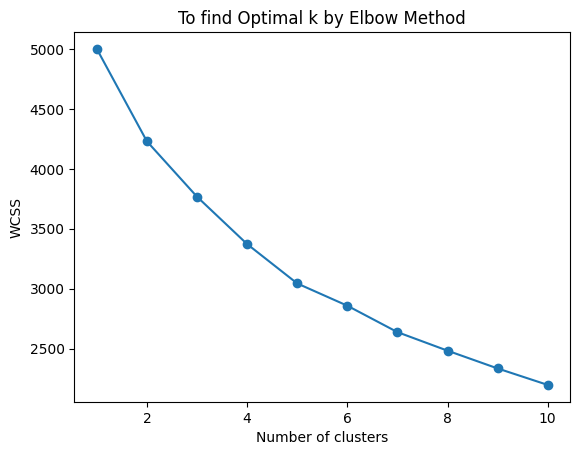

In [157]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("To find Optimal k by Elbow Method")

In [158]:
from kneed import KneeLocator
k=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [159]:
k.knee

np.int64(5)

In [160]:
modelk=KMeans(n_clusters=k.knee,init='k-means++',random_state=42)
modelk.fit(x)
y_pred=modelk.predict(x)

In [161]:
print("Silhouette:",silhouette_score(x,model.labels_))

Silhouette: 0.17467862960170905


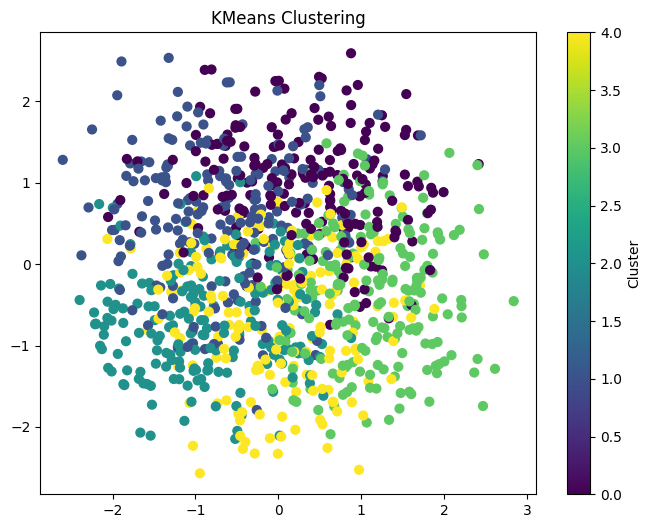

In [162]:
pca=PCA(n_components=3)
x_pca=pca.fit_transform(x)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred,s=40)
plt.title("KMeans Clustering")
plt.colorbar(label="Cluster")
plt.show()

Hierarchical

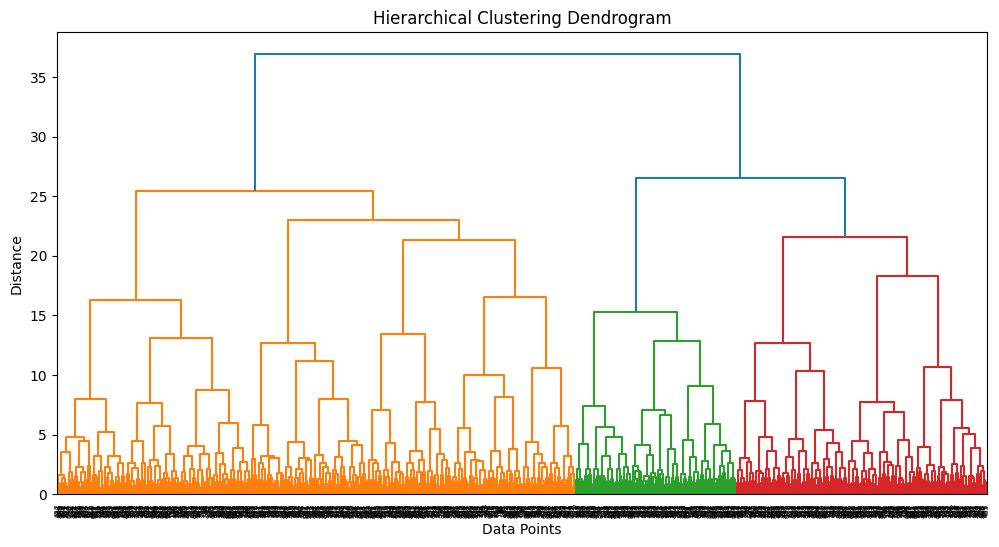

In [163]:
plt.figure(figsize=(12,6))
dendrogram(linkage(x,method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [164]:

modela=AgglomerativeClustering(metric='euclidean',n_clusters=2)
y_pre=modela.fit_predict(x_pca)
print("Silhouette:",silhouette_score(x,modela.labels_))

Silhouette: 0.12548822358028391


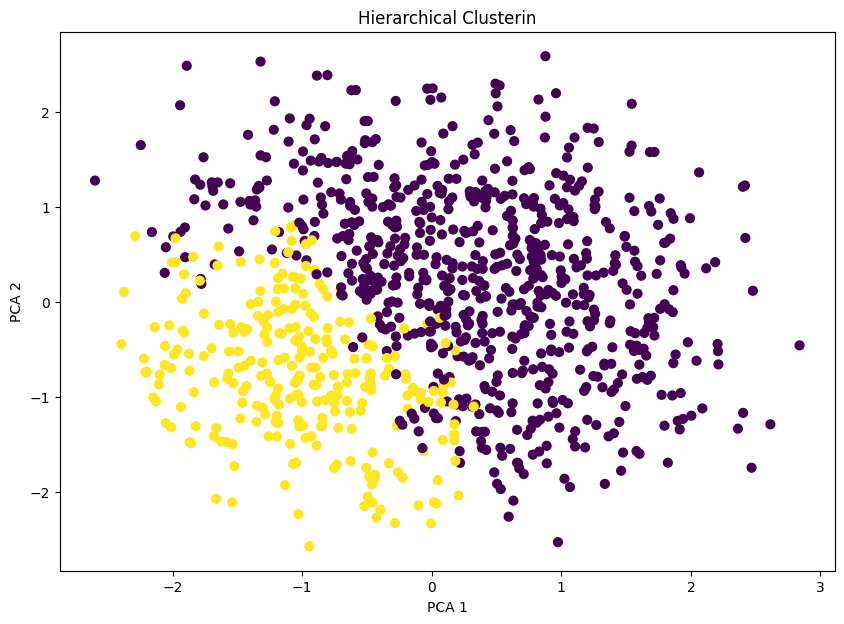

In [165]:
plt.figure(figsize=(10,7))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pre,s=40)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Hierarchical Clusterin")
plt.show()

DBSCAN

In [166]:
'''best_score=0.50
from sklearn.cluster import DBSCAN
epsvalues=[0.5,0.1,0.01,1.0]
minsamplesvalues=[1,2,3,4,5,6,7,8]
for eps in epsvalues:
    for min_samples in minsamplesvalues:
        model=DBSCAN(eps=eps,min_samples=min_samples)
        labels=model.fit_predict(x)
        if len(set(labels))<=1:
            continue
        score=silhouette_score(x,labels)
        if score>best_score:
            best_score=score
            best_params=(eps, min_samples)'''

'best_score=0.50\nfrom sklearn.cluster import DBSCAN\nepsvalues=[0.5,0.1,0.01,1.0]\nminsamplesvalues=[1,2,3,4,5,6,7,8]\nfor eps in epsvalues:\n    for min_samples in minsamplesvalues:\n        model=DBSCAN(eps=eps,min_samples=min_samples)\n        labels=model.fit_predict(x)\n        if len(set(labels))<=1:\n            continue\n        score=silhouette_score(x,labels)\n        if score>best_score:\n            best_score=score\n            best_params=(eps, min_samples)'

In [167]:
modeld=DBSCAN(eps=0.7,min_samples=3)
y_p=modeld.fit_predict(x_pca)

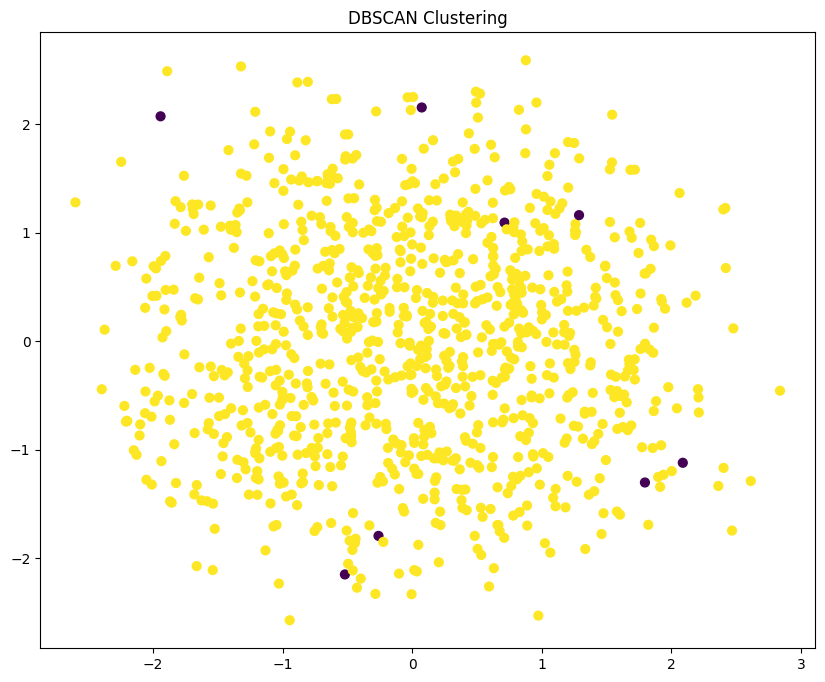

In [168]:
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_p,s=40)
plt.title("DBSCAN Clustering")
plt.show()

In [169]:
import pickle
modela=pickle.dump(modela,open('modela.pkl','wb'))
modelk=pickle.dump(modelk,open('modelk.pkl','wb'))
modeld=pickle.dump(modeld,open('modeld.pkl','wb'))
scaler=pickle.dump(pca,open('scaler.pkl','wb'))